# Trabajo Práctico 2

#### Algunas anotaciones
usar un perceptrón simple = 1

El bias es un parámetro mas que es optimizable (es constante iteración tras iteración)


# 1. Implemente un perceptrón simple que aprenda la función lógica AND y la función lógica OR, de 2 y de 4 entradas. Muestre la evolución del error durante el entrenamiento. Para el caso de 2 dimensiones, grafique la recta discriminadora y todos los vectores de entrada de la red.

In [22]:
from itertools import product
from typing import List, Tuple
import matplotlib.pyplot as plt

In [11]:
def step(z: float) -> int:
    """
    Ultima parte del pipeline, transforma la combinación lineal en una decisión binaria
    """
    return 1 if z >= 0 else 0

In [ ]:
# Clase Perceptron
class Perceptron:
    def __init__(self, n_features: int, learning_rate: float = 0.1, max_ciclos_entrenamiento: int = 1000):
        # pesos (vector de tamaño n_features) inicializados en 0
        self.weights =  [0.0] * n_features
        # bias inicializado en 0. El valor diferente no importa, es justo una combinacion que da mejor, pero no me garantiza convergencia mas rápida otro valor
        self.bias :  float = 0.0
        # tasa de aprendizaje
        self.learning_rate = learning_rate
        # max cantidad de ciclos que pueden darse
        self.max_ciclos_entrenamiento = max_ciclos_entrenamiento # basicamente para evitar bucles infinitos

    def combinacion_lineal(self, x: List[float]) -> float:
        """
        Calcula la combinación lineal:
        z = (w1 * x1 + w2 * x2 + ... + wn * xn) + bias
        Parametros:
        ----------
        x: Lista de entradas que recibe el perceptrón, donde x = [0,1] o x = [1,0,0,1] (por ejemplo)
        """
        # producto punto entre weights y x
        z = sum(wi * xi for wi, xi in zip(self.weights, x))  
        # Le  sumo el bias
        z += self.bias
        return z

    def activacion_sigma(self, x: List[float]) -> int:
        """
        Función de activación sigma. Devuelve 0 o 1
        """
        return step(self.combinacion_lineal(x))

    def entrenamiento(self, X: List[List[float]], y: List[int]) -> Tuple[int, List[float]]:
        """
        Entrena con la regla del perceptrón (etiquetas 0/1).
        Devuelve:
        - epochs_efectivos utilizados
        - copia de los pesos finales (el bias se lee en self.bias)
        Además guarda la historia de errores por época en self.errores_por_epoca.
        """
        n = len(X)
        indices = list(range(n))
        self.errores_por_epoca: List[int] = []

        for epoch in range(1, self.max_ciclos_entrenamiento + 1):
            errors = 0
            for i in indices:
                xi, yi = X[i], y[i]
                y_hat = self.activacion_sigma(xi)   # ¡usar activación, no z crudo!
                err = yi - y_hat
                if err != 0:
                    # Actualización: w <- w + eta * err * x ; b <- b + eta * err
                    for k in range(len(xi)):
                        self.weights[k] += self.learning_rate * err * xi[k]
                    self.bias += self.learning_rate * err
                    errors += 1
            self.errores_por_epoca.append(errors)
            if errors == 0:
                return epoch, self.weights[:]  # convergió
        return self.max_ciclos_entrenamiento, self.weights[:]



In [47]:
# Funciones auxiliares para calcular datasets

def generador_dataset_AND(n_bits: int) -> Tuple[List[List[int]], List[int]]:
    X = [list(bits) for bits in product([0, 1], repeat=n_bits)]
    y = [int(all(bits)) for bits in X]
    return X, y

def generador_dataset_OR(n_bits: int) -> Tuple[List[List[int]], List[int]]:
    X = [list(bits) for bits in product([0, 1], repeat=n_bits)]
    y = [int(any(bits)) for bits in X]
    return X, y

In [48]:
# Funcion auxiliar para probar el funcionamiento del Perceptron

def evaluate(model: Perceptron, X: List[List[int]], y: List[int], title: str):
    print(f"\n=== {title} ===")
    correct = 0
    for xi, yi in zip(X, y):
        yh = model.activacion_sigma(xi)
        ok = "✓" if yh == yi else "✗"
        print(f"x={xi} -> y_hat={yh} (y={yi}) {ok}")
        correct += int(yh == yi)
    print(f"Accuracy: {correct}/{len(X)} = {correct/len(X):.2f}")
    print(f"weights: {model.weights}, bias: {model.bias}")


In [49]:
# AND 2 entradas
X2_and, y2_and = generador_dataset_AND(2)
p_and2 = Perceptron(n_features=2, learning_rate=0.2, max_ciclos_entrenamiento=100)
ep_and2, _ = p_and2.entrenamiento(X2_and, y2_and)
evaluate(p_and2, X2_and, y2_and, "AND (2 entradas)")


=== AND (2 entradas) ===
x=[0, 0] -> y_hat=0 (y=0) ✓
x=[0, 1] -> y_hat=0 (y=0) ✓
x=[1, 0] -> y_hat=0 (y=0) ✓
x=[1, 1] -> y_hat=1 (y=1) ✓
Accuracy: 4/4 = 1.00
weights: [0.4, 0.2], bias: -0.4000000000000001


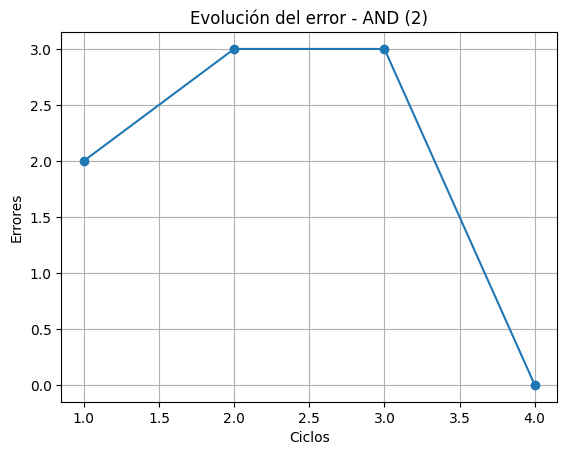

In [50]:
# Grafico de evolución del error en AND (2)
plt.plot(range(1, len(p_and2.errores_por_epoca)+1), p_and2.errores_por_epoca, marker='o')
plt.xlabel('Ciclos'); plt.ylabel('Errores'); plt.title('Evolución del error - AND (2)')
plt.grid(True); plt.show()

In [ ]:




p_or2 = Perceptron(n_features=2, learning_rate=0.2, max_ciclos_entrenamiento=100)
ep_or2, _ = p_or2.entrenamiento(X2_or, y2_or)
evaluate(p_or2, X2_or, y2_or, "OR (2 entradas)")

# AND / OR de 4 entradas
X4_and, y4_and = generador_dataset_AND(4)
X4_or,  y4_or  = generador_dataset_OR(4)

p_and4 = Perceptron(n_features=4, learning_rate=0.2, max_ciclos_entrenamiento=200)
ep_and4, _ = p_and4.entrenamiento(X4_and, y4_and)
evaluate(p_and4, X4_and, y4_and, "AND (4 entradas)")

p_or4 = Perceptron(n_features=4, learning_rate=0.2, max_ciclos_entrenamiento=200)
ep_or4, _ = p_or4.entrenamiento(X4_or, y4_or)
evaluate(p_or4, X4_or, y4_or, "OR (4 entradas)")



=== AND (2 entradas) ===
x=[0, 0] -> y_hat=0 (y=0) ✓
x=[0, 1] -> y_hat=0 (y=0) ✓
x=[1, 0] -> y_hat=0 (y=0) ✓
x=[1, 1] -> y_hat=1 (y=1) ✓
Accuracy: 4/4 = 1.00
weights: [0.4, 0.2], bias: -0.4000000000000001

=== OR (2 entradas) ===
x=[0, 0] -> y_hat=0 (y=0) ✓
x=[0, 1] -> y_hat=1 (y=1) ✓
x=[1, 0] -> y_hat=1 (y=1) ✓
x=[1, 1] -> y_hat=1 (y=1) ✓
Accuracy: 4/4 = 1.00
weights: [0.2, 0.2], bias: -0.2

=== AND (4 entradas) ===
x=[0, 0, 0, 0] -> y_hat=0 (y=0) ✓
x=[0, 0, 0, 1] -> y_hat=0 (y=0) ✓
x=[0, 0, 1, 0] -> y_hat=0 (y=0) ✓
x=[0, 0, 1, 1] -> y_hat=0 (y=0) ✓
x=[0, 1, 0, 0] -> y_hat=0 (y=0) ✓
x=[0, 1, 0, 1] -> y_hat=0 (y=0) ✓
x=[0, 1, 1, 0] -> y_hat=0 (y=0) ✓
x=[0, 1, 1, 1] -> y_hat=0 (y=0) ✓
x=[1, 0, 0, 0] -> y_hat=0 (y=0) ✓
x=[1, 0, 0, 1] -> y_hat=0 (y=0) ✓
x=[1, 0, 1, 0] -> y_hat=0 (y=0) ✓
x=[1, 0, 1, 1] -> y_hat=0 (y=0) ✓
x=[1, 1, 0, 0] -> y_hat=0 (y=0) ✓
x=[1, 1, 0, 1] -> y_hat=0 (y=0) ✓
x=[1, 1, 1, 0] -> y_hat=0 (y=0) ✓
x=[1, 1, 1, 1] -> y_hat=1 (y=1) ✓
Accuracy: 16/16 = 1.00
weights: [0